In [1]:
from __future__ import print_function
import os
import pandas as pd
import numpy as np
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.tsa import stattools
%matplotlib inline
from matplotlib import pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
os.chdir('E:/Practical Time Series')

In [3]:
daily_temp = pd.read_excel('datasets/mean-daily-temperature-fisher-river.xlsx')

In [4]:
daily_temp.head(20)

,Date,Mean_Temperature
0,1988-01-01,-23.00
1,1988-01-02,-20.50
2,1988-01-03,-22.00
3,1988-01-04,-30.50
4,1988-01-05,-31.00
5,1988-01-06,-27.50
6,1988-01-07,-26.25
7,1988-01-08,-26.50
8,1988-01-09,-23.00
9,1988-01-10,-23.50


In [5]:
daily_temp.index = daily_temp['Date'].map(lambda date: pd.to_datetime(date, '%Y-%m-%d'))
daily_temp.drop('Date', axis=1, inplace=True)

In [6]:
daily_temp.head(20)

,Mean_Temperature
Date,
1988-01-01,-23.00
1988-01-02,-20.50
1988-01-03,-22.00
1988-01-04,-30.50
1988-01-05,-31.00
1988-01-06,-27.50
1988-01-07,-26.25
1988-01-08,-26.50
1988-01-09,-23.00


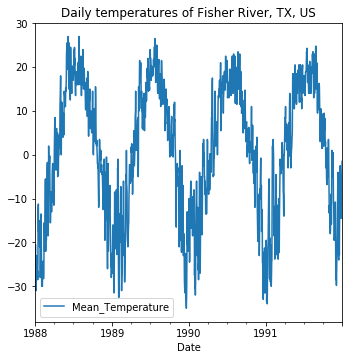

In [7]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
ax.set_title('Daily temperatures of Fisher River, TX, US')
daily_temp.plot(ax=ax)
plt.savefig('plots/Section 2/_02_07.png', format='png', dpi=300)

In [8]:
montly_resample = daily_temp['Mean_Temperature'].resample('M')
monthly_mean_temp = montly_resample.mean()
print('Shape of monthly mean temperature dataset:', monthly_mean_temp.shape)
monthly_mean_temp.head(10)

Shape of monthly mean temperature dataset: (48,)


Date
1988-01-31   -22.137097
1988-02-29   -19.025862
1988-03-31    -8.258065
1988-04-30     2.641667
1988-05-31    11.290323
1988-06-30    19.291667
1988-07-31    19.048387
1988-08-31    17.379032
1988-09-30    10.675000
1988-10-31     2.467742
Freq: M, Name: Mean_Temperature, dtype: float64

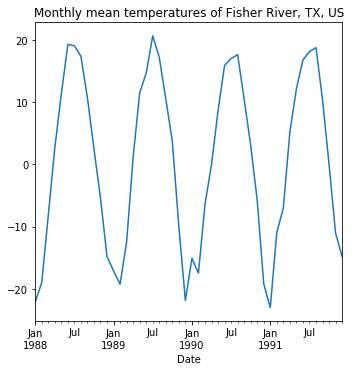

In [9]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
ax.set_title('Monthly mean temperatures of Fisher River, TX, US')
monthly_mean_temp.plot(ax=ax)
plt.savefig('plots/Section 2/_02_08.png', format='png', dpi=300)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  after removing the cwd from sys.path.


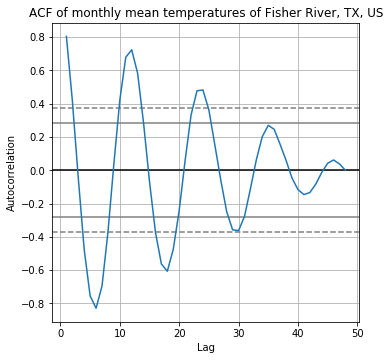

In [10]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
ax.set_title('ACF of monthly mean temperatures of Fisher River, TX, US')
autocorrelation_plot(monthly_mean_temp, ax=ax)
plt.savefig('plots/Section 2/_02_9.png', format='png', dpi=300)

In [11]:
seasonal_diff = monthly_mean_temp.diff(12)

In [12]:
seasonal_diff = seasonal_diff[12:]

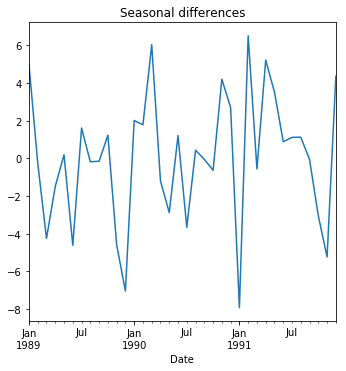

In [13]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
ax.set_title('Seasonal differences')
seasonal_diff.plot(ax=ax)
plt.savefig('plots/Section 2/_02_10.png', format='png', dpi=300)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  after removing the cwd from sys.path.


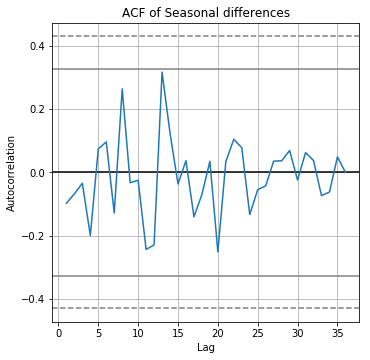

In [14]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
ax.set_title('ACF of Seasonal differences')
autocorrelation_plot(seasonal_diff, ax=ax)
plt.savefig('plots/Section 2/_02_11.png', format='png', dpi=300)

In [15]:
_, _, _, pval_monthly_mean = stattools.acf(monthly_mean_temp, unbiased=True,
                                           nlags=10, qstat=True, alpha=0.05)
print('Null hypothesis is rejected for lags:', np.where(pval_monthly_mean<=0.05))

Null hypothesis is rejected for lags: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),)


In [16]:
_, _, _, pval_seasonal_diff = stattools.acf(seasonal_diff, unbiased=True,
                                            nlags=10, qstat=True, alpha=0.05)
print('Null hypothesis is rejected for lags:', np.where(pval_seasonal_diff<=0.05))

Null hypothesis is rejected for lags: (array([], dtype=int64),)
